In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# custom module imports
# import acquire as aq
import Prepare as pr
# import explore as ex

# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# import scaling methods
from sklearn.preprocessing import RobustScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

# import modeling methods
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from scipy import stats

# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('salaries.csv')

In [48]:
df.head()

,AGY,NAME,LASTNAME,FIRSTNAME,MI,JOBCLASS,JC TITLE,RACE,SEX,EMPTYPE,...,RATE,HRSWKD,MONTHLY,ANNUAL,STATENUM,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,101,SENATE ...,GILLIAM,STACEY,L,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,8100.0,97200.0,339371,True,NaN,NaN,181200.0,NaN
1,104,LEGISLATIVE BUDGET BOARD ...,GILLIAM,STACEY,L,C160,COMMITTEE DIRECTOR ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,7000.0,84000.0,339371,True,NaN,NaN,NaN,True
2,101,SENATE ...,NELSON,DAVID,,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,9500.0,114000.0,193187,True,NaN,NaN,210000.0,NaN
3,104,LEGISLATIVE BUDGET BOARD ...,NELSON,DAVID,,P080,SENIOR BUDGET ADVISOR ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,8000.0,96000.0,193187,True,NaN,NaN,NaN,True
4,101,SENATE ...,ROCHA,MARIE,S,7103,LEG. SERVICE/MAINTENANCE ...,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0,41.0,3365.4,40384.8,152257,True,NaN,True,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144738 entries, 0 to 144737
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGY                      144738 non-null  int64  
 1   NAME                     144738 non-null  object 
 2   LASTNAME                 144738 non-null  object 
 3   FIRSTNAME                144738 non-null  object 
 4   MI                       144738 non-null  object 
 5   JOBCLASS                 144738 non-null  object 
 6   JC TITLE                 144738 non-null  object 
 7   RACE                     144738 non-null  object 
 8   SEX                      144738 non-null  object 
 9   EMPTYPE                  144738 non-null  object 
 10  HIREDT                   144738 non-null  object 
 11  RATE                     144738 non-null  float64
 12  HRSWKD                   144738 non-null  float64
 13  MONTHLY                  144738 non-null  float64
 14  ANNU

In [52]:
df[df.AGY==696]

,AGY,NAME,LASTNAME,FIRSTNAME,MI,JOBCLASS,JC TITLE,RACE,SEX,EMPTYPE,...,RATE,HRSWKD,MONTHLY,ANNUAL,STATENUM,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
13,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,AKOZAR,ANGEL,A,4503,CORREC OFFCR III ...,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3019.84,36238.08,957115,True,True,NaN,NaN,NaN
18,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,HARRIS,DAJIA,D,4503,CORREC OFFCR III ...,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3019.84,36238.08,1272776,True,True,NaN,NaN,NaN
103113,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,AARON,AMANDA,R,1351,INVESTIGATOR II ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,2920.42,35045.04,382675,NaN,NaN,NaN,NaN,NaN
103114,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,AARON,GRACE,,4504,CORREC OFFICER IV ...,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3284.27,39411.24,1183223,NaN,NaN,NaN,NaN,NaN
103115,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,AARON,LA VONDA,P,0057,CLERK II ...,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,2031.29,24375.48,106962,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136067,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ZWAHR,DEAN,A,4505,CORREC OFFICER V ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3629.45,43553.40,8523,NaN,NaN,NaN,NaN,NaN
136068,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ZWAR,JEREMY,W,4510,SGT OF CORREC OFFCRS ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3906.09,46873.08,15034,NaN,NaN,NaN,NaN,NaN
136069,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ZWEIACKER,KARA,D,4503,CORREC OFFCR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3019.84,36238.08,1287136,NaN,NaN,NaN,NaN,NaN
136070,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ZWEIACKER,MARCUS,D,4504,CORREC OFFICER IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3284.27,39411.24,1143776,NaN,NaN,NaN,NaN,NaN


In [51]:
df[df.AGY==529]

,AGY,NAME,LASTNAME,FIRSTNAME,MI,JOBCLASS,JC TITLE,RACE,SEX,EMPTYPE,...,RATE,HRSWKD,MONTHLY,ANNUAL,STATENUM,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
10,529,HEALTH AND HUMAN SERVICES COMMISSION ...,TERRAZAS,BRENDA,,0173,LICENSE AND PERMIT SPEC IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3293.41,39520.92,193274,True,True,NaN,NaN,NaN
15,529,HEALTH AND HUMAN SERVICES COMMISSION ...,COURTNEY,EMILY,R,4421,LICENSED VOCATIONAL NURSE I ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,2771.81,33261.72,1273494,True,True,NaN,NaN,NaN
16,529,HEALTH AND HUMAN SERVICES COMMISSION ...,DAVIS,BRITTANY,T,1325,INSPECTOR V ...,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,4594.16,55129.92,763078,True,True,NaN,NaN,NaN
17,529,HEALTH AND HUMAN SERVICES COMMISSION ...,GUYNES-SMITH,JEWELIA,A,0154,ADMINISTRATIVE ASST III ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,2748.00,32976.00,1056073,True,True,NaN,NaN,NaN
20,529,HEALTH AND HUMAN SERVICES COMMISSION ...,KERN,LYNN,,1018,ACCOUNTANT IV ...,ASIAN,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,4500.00,54000.00,1081409,True,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68693,529,HEALTH AND HUMAN SERVICES COMMISSION ...,ZUNIGA - CHAMBLESS,STEPHANIE,,1601,MGR II ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,4920.57,59046.84,1141763,NaN,NaN,NaN,NaN,NaN
68694,529,HEALTH AND HUMAN SERVICES COMMISSION ...,ZURFLUH,ROBERT,,4411,NURSE I ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,4966.12,59593.44,1272665,NaN,NaN,NaN,NaN,NaN
68695,529,HEALTH AND HUMAN SERVICES COMMISSION ...,ZUROVETZ,KATIE,L,0230,SYSTEMS SUPPORT SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3100.00,37200.00,1197447,NaN,NaN,NaN,NaN,NaN
68696,529,HEALTH AND HUMAN SERVICES COMMISSION ...,ZWAHR,PATRICIA,L,1980,CONTRACT SPEC II ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3081.33,36975.96,100439,NaN,NaN,NaN,NaN,NaN


In [50]:
df.AGY.value_counts()

529    34561
696    32961
601    13037
530    12568
405    10388
       ...  
513        8
364        7
514        7
481        5
213        4
Name: AGY, Length: 111, dtype: int64

In [5]:
df.RACE.value_counts()

WHITE              64651
HISPANIC           39557
BLACK              33964
ASIAN               4419
OTHER               1453
AM INDIAN            694
Name: RACE, dtype: int64

In [6]:
df['JC TITLE'].value_counts()

CORREC  OFFICER IV                                    8753
CORREC  OFFICER V                                     7350
TEXAS WORKS ADVISOR II                                3812
CORREC OFFCR III                                      3652
DIRECT SUPPORT PROFESSIONAL I                         2484
                                                      ... 
INVESTIGATIVE ANALYST                                    1
EXECUTIVE DIRECTOR FOR ERS                               1
MILITARY SPECIALIST V                                    1
EXECUTIVE DIRECTOR/SECRETARY                             1
ADMINISTRATIVE ASSISTANT IV                              1
Name: JC TITLE, Length: 1406, dtype: int64

In [3]:
df = pr.prepare_tex(df)

In [4]:
df = pr.create_features(df)

In [5]:
train, validate, test = pr.split_data(df)

Making Sure Our Shapes Look Good
Train: (81048, 24), Validate: (34736, 24), Test: (28946, 24)


In [6]:
train.columns

Index(['agency_id', 'agency', 'lastname', 'firstname', 'title', 'race', 'sex',
       'emptype', 'hire_date', 'hours_worked', 'monthly_salary',
       'annual_salary', 'is_female', 'is_white', 'is_hispanic', 'is_black',
       'is_BIPOC', 'race_encoded', 'tenure_months', 'tenure_years',
       'is_elected', 'is_director', 'is_unclassified', 'is_parttime'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81048 entries, 125096 to 89798
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   agency_id        81048 non-null  int64         
 1   agency           81048 non-null  object        
 2   lastname         81048 non-null  object        
 3   firstname        81048 non-null  object        
 4   title            81048 non-null  object        
 5   race             81048 non-null  object        
 6   sex              81048 non-null  object        
 7   emptype          81048 non-null  object        
 8   hire_date        81048 non-null  datetime64[ns]
 9   hours_worked     81048 non-null  float64       
 10  monthly_salary   81048 non-null  float64       
 11  annual_salary    81048 non-null  float64       
 12  is_female        81048 non-null  int64         
 13  is_white         81048 non-null  int64         
 14  is_hispanic      81048 non-null  

In [8]:
# assign X and y variables in all our split dfs
X_train = train[['agency_id', 'hours_worked','is_female', 'is_white', 
                'is_hispanic', 'is_black', 'is_BIPOC', 'race_encoded', 'tenure_months',
                'tenure_years', 'is_elected', 'is_director', 'is_unclassified', 'is_parttime']]
y_train = train[['annual_salary']]

X_validate = validate[['agency_id', 'hours_worked','is_female', 'is_white', 
                'is_hispanic', 'is_black', 'is_BIPOC', 'race_encoded', 'tenure_months',
                'tenure_years', 'is_elected', 'is_director', 'is_unclassified', 'is_parttime']]
y_validate = validate[['annual_salary']]

X_test = test[['agency_id', 'hours_worked','is_female', 'is_white', 
                'is_hispanic', 'is_black', 'is_BIPOC', 'race_encoded', 'tenure_months',
                'tenure_years', 'is_elected', 'is_director', 'is_unclassified', 'is_parttime']]
y_test = test[['annual_salary']]

In [9]:
def select_rfe(X, y, k, return_rankings=False, model=LinearRegression()):
    '''
    This function takes in the X variables as a dataframe, the target variable, number of features to 
    select for modeling (k) with default modle set to Linear Regression. It returns the top k features 
    as well as the rankings for all features.
    '''
    # Use the passed model, LinearRegression by default
    rfe = RFE(model, n_features_to_select=k)
    rfe.fit(X, y)
    features = X.columns[rfe.support_].tolist()
    if return_rankings:
        rankings = pd.Series(dict(zip(X.columns, rfe.ranking_)))
        return features, rankings
    else:
        return features

In [10]:
# call rfe function from explore script
features_to_use, feature_rankings = select_rfe(X_train, y_train, 7, return_rankings=True)

In [11]:
features_to_use

['is_white',
 'is_black',
 'is_BIPOC',
 'race_encoded',
 'is_director',
 'is_unclassified',
 'is_parttime']

In [12]:
features = ['is_white',
 'is_black',
 'is_BIPOC',
 'race_encoded',
 'is_director',
 'is_unclassified',
 'is_parttime']

In [13]:
# 1. Predict mean annual 
sal_pred_mean = y_train.annual_salary.mean()
y_train['sal_pred_mean'] = sal_pred_mean
y_validate['sal_pred_mean'] = sal_pred_mean

# 2. Predict median tax value 
sal_pred_median = y_train.annual_salary.median()
y_train['sal_pred_median'] = sal_pred_median
y_validate['sal_pred_median'] = sal_pred_median

# 3. RMSE of tv_pred_mean
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 5), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 5))

# 4. RMSE of tv_pred_median
rmse_train1 = mean_squared_error(y_train.annual_salary, y_train.sal_pred_median) ** .5
rmse_validate1 = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_median) ** .5
print('-----------')
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train1, 5), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate1, 5))

RMSE using Mean
Train/In-Sample:  25758.77625 
Validate/Out-of-Sample:  25431.1923
-----------
RMSE using Median
Train/In-Sample:  26727.62101 
Validate/Out-of-Sample:  26448.16247


In [14]:
# add the mean baseline to a df to help evaluate all models side by side
metric_df = pd.DataFrame(data=[{
    'model': 'median_baseline',
    'rmse_outofsample': rmse_validate1,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_median)}])

## OLS Linear Regression

In [15]:
# create the model object

lm = LinearRegression(fit_intercept=True)

# fit the model to our training data. We must specify the column in y_train, since we have converted it to a dataframe from a series! 

# fit the thing using only the features we selected
lm.fit(X_train[features], y_train.annual_salary)

# predict train

y_train['sal_pred_lm'] = lm.predict(X_train[features])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_lm) ** (1/2)

# predict validate
y_validate['sal_pred_lm'] = lm.predict(X_validate[features])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  22691.164842289778 
Validation/Out-of-Sample:  22537.912412970338


In [16]:
# add model's performance to metric df
metric_df = metric_df.append(
    {
    'model': 'OLS lm',
    'rmse_outofsample': rmse_validate,
        'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_lm)}, ignore_index=True)

In [17]:
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656


## Lasso Lars Model

In [18]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data using only selected features. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train[features], y_train.annual_salary)

# predict train
y_train['sal_pred_lars'] = lars.predict(X_train[features])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_lars) ** 0.5

# predict validate
y_validate['sal_pred_lars'] = lars.predict(X_validate[features])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  22784.01463715798 
Validation/Out-of-Sample:  22652.214468088205


In [19]:
# add model to metric df
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_lars)}, ignore_index=True)

In [20]:
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668


## Tweedie Regressor GLM

In [21]:
# create the model object
glm = TweedieRegressor(power=0, alpha=1)

# fit the model to our training data using only selected features. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series

glm.fit(X_train[features], y_train.annual_salary)

# predict train
y_train['sal_pred_glm'] = glm.predict(X_train[features])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_glm) ** 0.5


# predict validate
y_validate['sal_pred_glm'] = glm.predict(X_validate[features])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_glm) ** 0.5

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  25286.856783650972 
Validation/Out-of-Sample:  24964.30475013445


In [22]:
# add model to metric df
metric_df = metric_df.append(
    {
    'model': 'Tweedie GLM power 1',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_glm)}, ignore_index=True)

In [23]:
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668
3,Tweedie GLM power 1,24964.304750,0.036377


## 2nd degree Polynomial Regression Model


In [24]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled features
X_train_degree2 = pf.fit_transform(X_train[features])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate[features])
X_test_degree2 = pf.transform(X_test[features])


In [25]:
#create the model object

pm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

# fit the thing

pm.fit(X_train_degree2, y_train.annual_salary)

# predict train

y_train['sal_pred_pm'] = pm.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_pm) ** (1/2)

# predict validate
y_validate['sal_pred_pm'] = pm.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_pm) ** (1/2)

print("RMSE for PolynomialRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for PolynomialRegression
Training/In-Sample:  22596.139469732876 
Validation/Out-of-Sample:  22430.595041676057


In [26]:
# add model to metric df
metric_df = metric_df.append(
    {
    'model': 'PolyReg Model',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_pm)}, ignore_index=True)
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668
3,Tweedie GLM power 1,24964.304750,0.036377
4,PolyReg Model,22430.595042,0.222114


## third degree polynomial

In [27]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled features
X_train_degree3 = pf.fit_transform(X_train[features])

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate[features])
X_test_degree3 = pf.transform(X_test[features])

In [28]:
#create the model object

pm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

# fit the thing

pm3.fit(X_train_degree3, y_train.annual_salary)

# predict train

y_train['sal_pred_pm3'] = pm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_pm3) ** (1/2)

# predict validate
y_validate['sal_pred_pm3'] = pm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_pm3) ** (1/2)

print("RMSE for PolynomialRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for PolynomialRegression
Training/In-Sample:  22596.139469732876 
Validation/Out-of-Sample:  22430.595041676057


In [29]:
# add model to metric df
metric_df = metric_df.append(
    {
    'model': 'PolyReg Model',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_pm3)}, ignore_index=True)
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668
3,Tweedie GLM power 1,24964.304750,0.036377
4,PolyReg Model,22430.595042,0.222114
5,PolyReg Model,22430.595042,0.222114


## Fitting on Test Split

In [30]:
# predict on test
y_test['sal_pred_pm'] = pm.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.annual_salary, y_test.sal_pred_pm) ** 0.5
print("RMSE for Model using PolynomialRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for Model using PolynomialRegression
Out-of-Sample Performance:  22297.326171611105


In [31]:
metric_df = metric_df.append(
    {
    'model': 'Test',
    'rmse_outofsample': rmse_test,
    'r^2_outofsample': explained_variance_score(y_test.annual_salary, y_test.sal_pred_pm)}, ignore_index=True)

In [32]:
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668
3,Tweedie GLM power 1,24964.304750,0.036377
4,PolyReg Model,22430.595042,0.222114
5,PolyReg Model,22430.595042,0.222114
6,Test,22297.326172,0.243110


In [34]:
df.columns

Index(['agency_id', 'agency', 'lastname', 'firstname', 'title', 'race', 'sex',
       'emptype', 'hire_date', 'hours_worked', 'monthly_salary',
       'annual_salary', 'is_female', 'is_white', 'is_hispanic', 'is_black',
       'is_BIPOC', 'race_encoded', 'tenure_months', 'tenure_years',
       'is_elected', 'is_director', 'is_unclassified', 'is_parttime'],
      dtype='object')

In [33]:
train.columns


Index(['agency_id', 'agency', 'lastname', 'firstname', 'title', 'race', 'sex',
       'emptype', 'hire_date', 'hours_worked', 'monthly_salary',
       'annual_salary', 'is_female', 'is_white', 'is_hispanic', 'is_black',
       'is_BIPOC', 'race_encoded', 'tenure_months', 'tenure_years',
       'is_elected', 'is_director', 'is_unclassified', 'is_parttime'],
      dtype='object')

In [35]:
## change features and reiterate

features = ['is_white',
 'is_black',
 'is_BIPOC',
 'race_encoded',
 'is_director',
 'is_unclassified',
 'is_parttime', 'tenure_months','agency_id','tenure_years']

In [36]:
# 1. Predict mean annual 
sal_pred_mean = y_train.annual_salary.mean()
y_train['sal_pred_mean'] = sal_pred_mean
y_validate['sal_pred_mean'] = sal_pred_mean

# 2. Predict median tax value 
sal_pred_median = y_train.annual_salary.median()
y_train['sal_pred_median'] = sal_pred_median
y_validate['sal_pred_median'] = sal_pred_median

# 3. RMSE of tv_pred_mean
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 5), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 5))

# 4. RMSE of tv_pred_median
rmse_train1 = mean_squared_error(y_train.annual_salary, y_train.sal_pred_median) ** .5
rmse_validate1 = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_median) ** .5
print('-----------')
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train1, 5), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate1, 5))

RMSE using Mean
Train/In-Sample:  25758.77625 
Validate/Out-of-Sample:  25431.1923
-----------
RMSE using Median
Train/In-Sample:  26727.62101 
Validate/Out-of-Sample:  26448.16247


In [37]:
# ols
# create the model object

lm = LinearRegression(fit_intercept=True)

# fit the model to our training data. We must specify the column in y_train, since we have converted it to a dataframe from a series! 

# fit the thing using only the features we selected
lm.fit(X_train[features], y_train.annual_salary)

# predict train

y_train['sal_pred_lm'] = lm.predict(X_train[features])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_lm) ** (1/2)

# predict validate
y_validate['sal_pred_lm'] = lm.predict(X_validate[features])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  21187.621559250158 
Validation/Out-of-Sample:  20911.988826466102


In [38]:
# add model's performance to metric df
metric_df = metric_df.append(
    {
    'model': 'OLS lm',
    'rmse_outofsample': rmse_validate,
        'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_lm)}, ignore_index=True)

In [39]:
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668
3,Tweedie GLM power 1,24964.304750,0.036377
4,PolyReg Model,22430.595042,0.222114
5,PolyReg Model,22430.595042,0.222114
6,Test,22297.326172,0.243110
7,OLS lm,20911.988826,0.323853


In [40]:
# lasso lars
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data using only selected features. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train[features], y_train.annual_salary)

# predict train
y_train['sal_pred_lars'] = lars.predict(X_train[features])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_lars) ** 0.5

# predict validate
y_validate['sal_pred_lars'] = lars.predict(X_validate[features])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  21361.82047604373 
Validation/Out-of-Sample:  21104.629353226184


In [41]:
# add model to metric df
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_lars)}, ignore_index=True)

In [42]:
# glm
# create the model object
glm = TweedieRegressor(power=0, alpha=1)

# fit the model to our training data using only selected features. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series

glm.fit(X_train[features], y_train.annual_salary)

# predict train
y_train['sal_pred_glm'] = glm.predict(X_train[features])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_glm) ** 0.5


# predict validate
y_validate['sal_pred_glm'] = glm.predict(X_validate[features])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_glm) ** 0.5

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  23459.332630575787 
Validation/Out-of-Sample:  23027.47170846243


In [43]:
# add model to metric df
metric_df = metric_df.append(
    {
    'model': 'Tweedie GLM power 1',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_glm)}, ignore_index=True)

In [44]:
# 2nd deg polynomial
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled features
X_train_degree2 = pf.fit_transform(X_train[features])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate[features])
X_test_degree2 = pf.transform(X_test[features])


In [45]:
#create the model object

pm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

# fit the thing

pm.fit(X_train_degree2, y_train.annual_salary)

# predict train

y_train['sal_pred_pm'] = pm.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_pm) ** (1/2)

# predict validate
y_validate['sal_pred_pm'] = pm.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_pm) ** (1/2)

print("RMSE for PolynomialRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for PolynomialRegression
Training/In-Sample:  20585.75238309553 
Validation/Out-of-Sample:  20290.719726405172


In [46]:
# add model to metric df
metric_df = metric_df.append(
    {
    'model': 'PolyReg Model',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_pm)}, ignore_index=True)
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668
3,Tweedie GLM power 1,24964.304750,0.036377
4,PolyReg Model,22430.595042,0.222114
5,PolyReg Model,22430.595042,0.222114
6,Test,22297.326172,0.243110
7,OLS lm,20911.988826,0.323853
8,LassoLars alpha 1,21104.629353,0.311349
9,Tweedie GLM power 1,23027.471708,0.180084


In [47]:
# third deg polynomial
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled features
X_train_degree3 = pf.fit_transform(X_train[features])

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate[features])
X_test_degree3 = pf.transform(X_test[features])

In [48]:
#create the model object

pm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

# fit the thing

pm3.fit(X_train_degree3, y_train.annual_salary)

# predict train

y_train['sal_pred_pm3'] = pm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.annual_salary, y_train.sal_pred_pm3) ** (1/2)

# predict validate
y_validate['sal_pred_pm3'] = pm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.annual_salary, y_validate.sal_pred_pm3) ** (1/2)

print("RMSE for PolynomialRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for PolynomialRegression
Training/In-Sample:  20585.75238309553 
Validation/Out-of-Sample:  20290.719726405172


In [49]:
# add model to metric df
metric_df = metric_df.append(
    {
    'model': 'PolyReg Model',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.annual_salary, y_validate.sal_pred_pm3)}, ignore_index=True)
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668
3,Tweedie GLM power 1,24964.304750,0.036377
4,PolyReg Model,22430.595042,0.222114
5,PolyReg Model,22430.595042,0.222114
6,Test,22297.326172,0.243110
7,OLS lm,20911.988826,0.323853
8,LassoLars alpha 1,21104.629353,0.311349
9,Tweedie GLM power 1,23027.471708,0.180084


In [50]:
# best model 2nd deg polynomial fit on test

# predict on test
y_test['sal_pred_pm'] = pm.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.annual_salary, y_test.sal_pred_pm) ** 0.5
print("RMSE for Model using PolynomialRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for Model using PolynomialRegression
Out-of-Sample Performance:  20108.90496523264


In [51]:
metric_df = metric_df.append(
    {
    'model': 'Test',
    'rmse_outofsample': rmse_test,
    'r^2_outofsample': explained_variance_score(y_test.annual_salary, y_test.sal_pred_pm)}, ignore_index=True)

In [52]:
metric_df

,model,rmse_outofsample,r^2_outofsample
0,median_baseline,26448.162472,0.000000
1,OLS lm,22537.912413,0.214656
2,LassoLars alpha 1,22652.214468,0.206668
3,Tweedie GLM power 1,24964.304750,0.036377
4,PolyReg Model,22430.595042,0.222114
5,PolyReg Model,22430.595042,0.222114
6,Test,22297.326172,0.243110
7,OLS lm,20911.988826,0.323853
8,LassoLars alpha 1,21104.629353,0.311349
9,Tweedie GLM power 1,23027.471708,0.180084


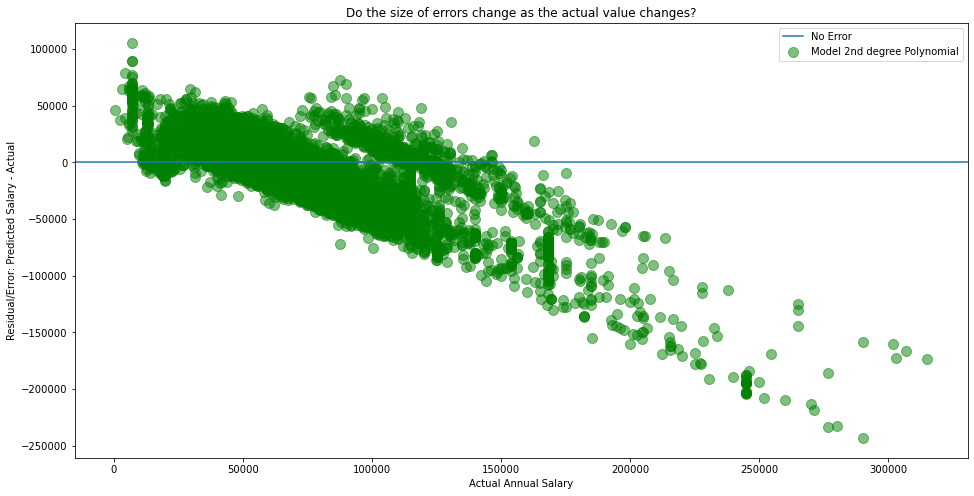

In [53]:
# plot the residuals for the best performing model

plt.figure(figsize=(16,8))
plt.axhline(label="No Error")

plt.scatter(y_validate.annual_salary, y_validate.sal_pred_pm - y_validate.annual_salary, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Annual Salary")
plt.ylabel("Residual/Error: Predicted Salary - Actual")
plt.title("Do the size of errors change as the actual value changes?")

plt.show()

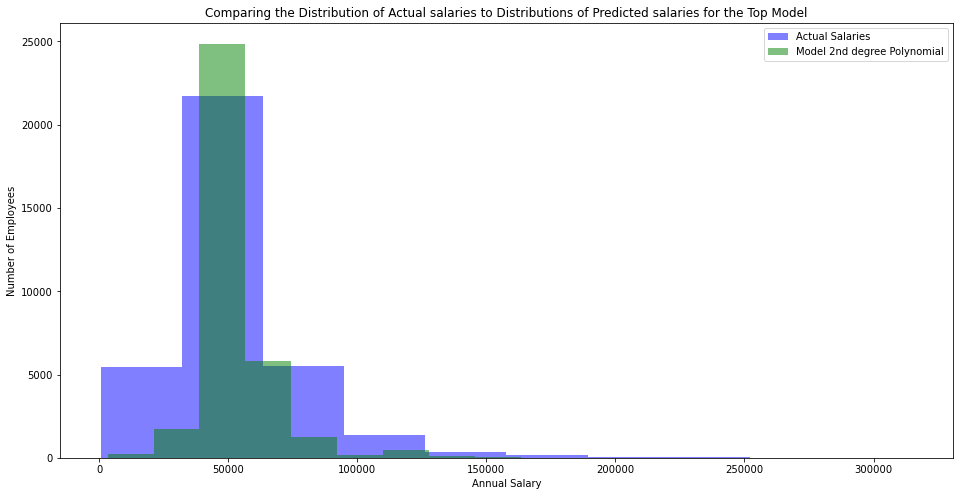

In [55]:
# plot to visualize actual vs predicted values
plt.figure(figsize=(16,8))
plt.hist(y_validate.annual_salary, color='blue', alpha=.5, label="Actual Salaries")
plt.hist(y_validate.sal_pred_pm, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Annual Salary")
plt.ylabel("Number of Employees")
plt.title("Comparing the Distribution of Actual salaries to Distributions of Predicted salaries for the Top Model")
plt.legend()
plt.show()